# **Seoul Bike Sharing Demand Predictions**
---
## The Seoul Bike Sharing Demand Predictions project aims to forecast the demand for bike rentals in Seoul, South Korea. By analyzing various factors such as weather conditions, time of day, and seasonal trends, the goal is to develop predictive models that accurately estimate the number of bikes rented at different hours.

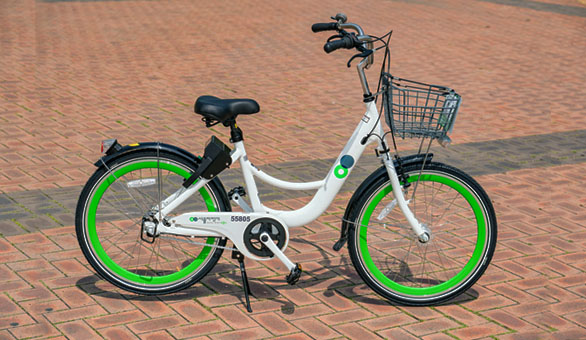

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Data Set Link ✅**
https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing

# **Data Description**
* **Date**: year-month-day
* **Rented Bike count**: Count of bikes rented at each hour
* **Hour**: Hour of the day
* **Temperature**: Temperature in Celsius
* **Humidity**: Percentage (%)
* **Windspeed**: Wind speed in meters per second (m/s)
* **Visibility**: Visibility in 10 meters (10m)
* **Dew point temperature**: Dew point temperature in Celsius
* **Solar radiation**: Solar radiation in MegaJoules per square meter (MJ/m2)
* **Rainfall**: Rainfall in millimeters (mm)
* **Snowfall**: Snowfall in centimeters (cm)
* **Seasons**: Winter, Spring, Summer, Autumn
* **Holiday**: Holiday/No holiday
* **Functional Day**: NoFunc (Non-Functional Hours), Fun (Functional Hours)

In [ ]:
bike = pd.read_csv(r"/content/drive/MyDrive/Github/SeoupSeoul Bike Sharing Demand Prediction /Dataset/SeoulBikeData.csv",encoding ="unicode_escape")

In [ ]:
bike.head()
# bike.tail()
# bike.sample()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike.shape

(8760, 14)

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
bike.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
bike.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
bike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# for i in bike.columns:
#    print({i:bike[i].unique()})

In [ ]:
column_names = bike.columns.tolist()
# Print the column names
for column_name in column_names:
    print(column_name)

Date
Rented Bike Count
Hour
Temperature(°C)
Humidity(%)
Wind speed (m/s)
Visibility (10m)
Dew point temperature(°C)
Solar Radiation (MJ/m2)
Rainfall(mm)
Snowfall (cm)
Seasons
Holiday
Functioning Day


#### **Making a Copy of the Dataset**

In [ ]:
data = bike.copy()

In [ ]:
sns.pairplot(bike)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# import matplotlib.pyplot as plt

# colname=[]
# for x in bike.columns[:-1]:
#     if data[x].dtype=="int64" or data[x].dtype=="float64":
#         colname.append(x)

# for x in colname:
#     data.boxplot(column=x)
#     plt.show()
# # so actually there are no outliers in the Data.

#### **Change the data type of the column**

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])
print(data["Date"].dtype)


datetime64[ns]


In [ ]:
data["week_day"] = data["Date"].dt.day_name()
data["Day"] = data["Date"].dt.day
data["Month"] = data["Date"].dt.month
data["Year"] = data["Date"].dt.year

In [ ]:
data.drop(["Date"], axis = 1,inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  week_day                   8760 non-null   objec

In [ ]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0
Snowfall (cm),8760.0,NaN,NaN,NaN,0.075068,0.436746,0.0,0.0,0.0,0.0,8.8


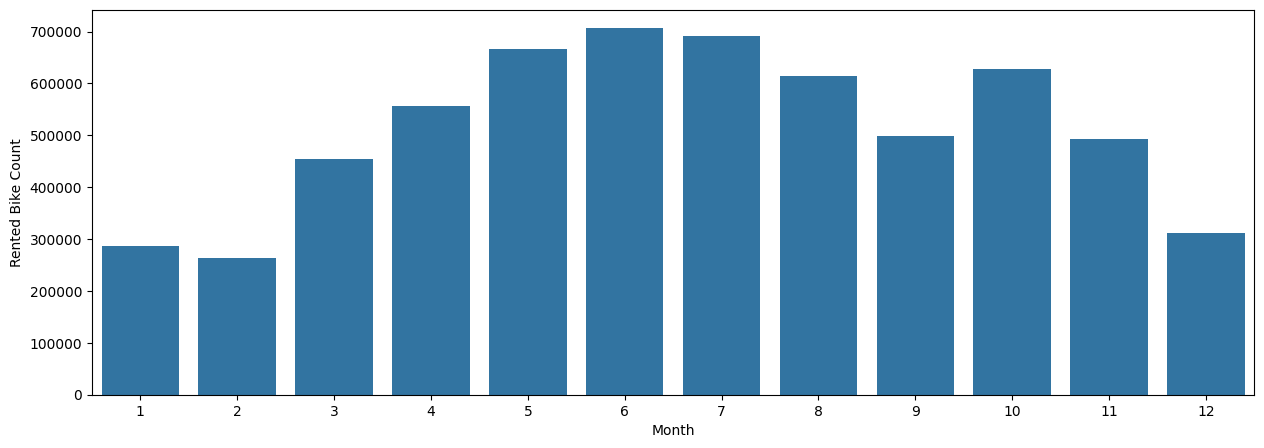

In [ ]:
# import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
# Grouping data by 'month' and summing the 'Rented Bike Count'
month = data.groupby("Month").sum().reset_index()
# Creating the bar plot
sns.barplot(x="Month", y="Rented Bike Count", data = month)
plt.show()

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

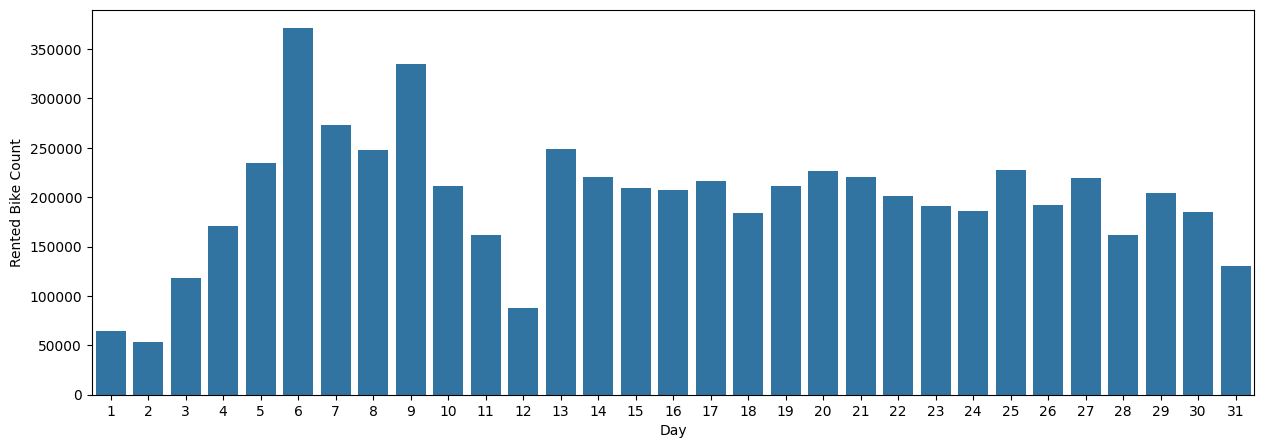

In [ ]:
plt.figure(figsize=(15,5))
Day = data.groupby("Day").sum().reset_index()
sns.barplot(x="Day", y="Rented Bike Count", data = Day)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

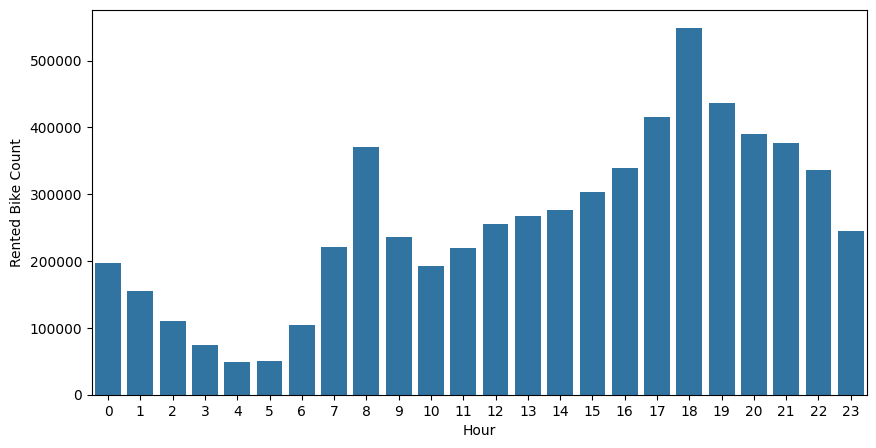

In [ ]:
plt.figure(figsize=(10,5))
Hour = data.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour", y="Rented Bike Count", data = Hour)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

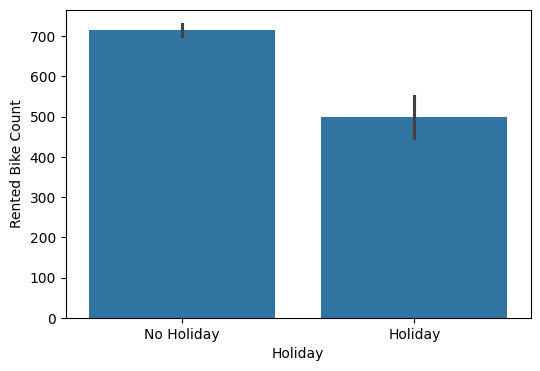

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x="Holiday", y="Rented Bike Count", data = data)

In [ ]:
print(data['Seasons'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']


<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

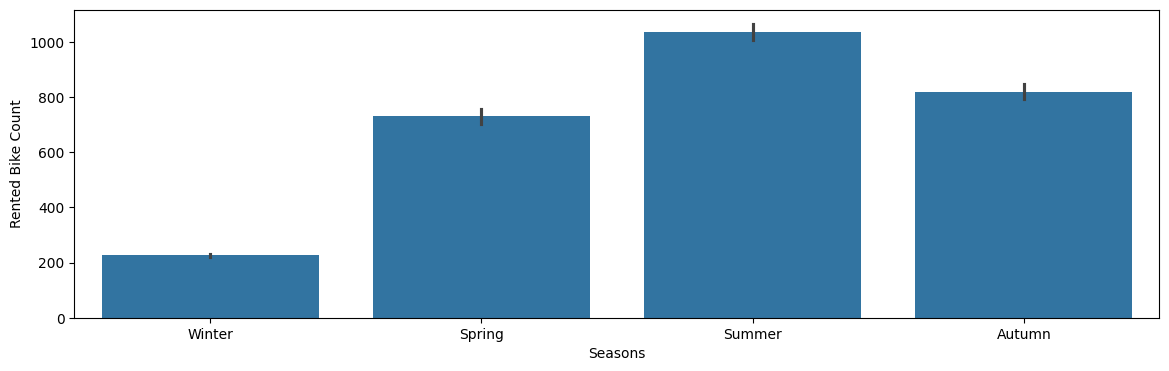

In [ ]:
plt.figure(figsize=(14,4))
sns.barplot(x="Seasons", y="Rented Bike Count", data = data)

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

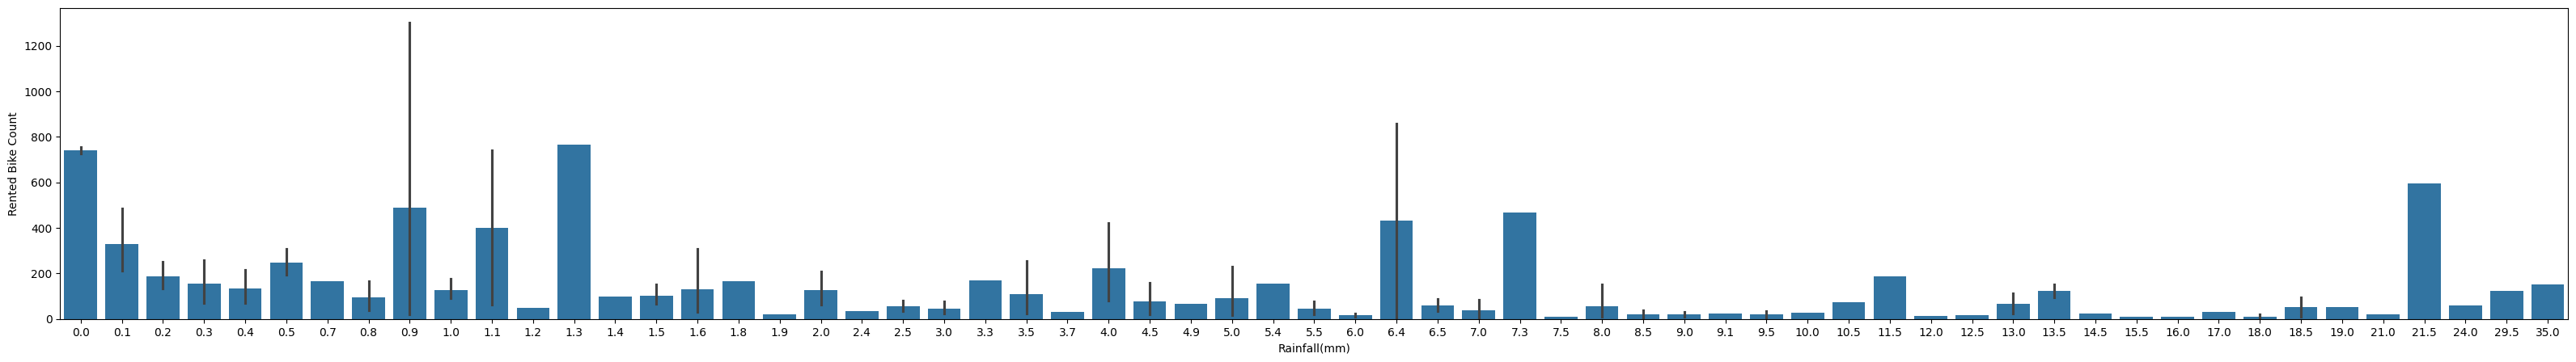

In [ ]:
plt.figure(figsize=(40,5))
sns.barplot(x="Rainfall(mm)", y="Rented Bike Count", data = data)

In [ ]:
# print(data["Rainfall(mm)"].value_counts().to_string())

<Figure size 1000x700 with 0 Axes>

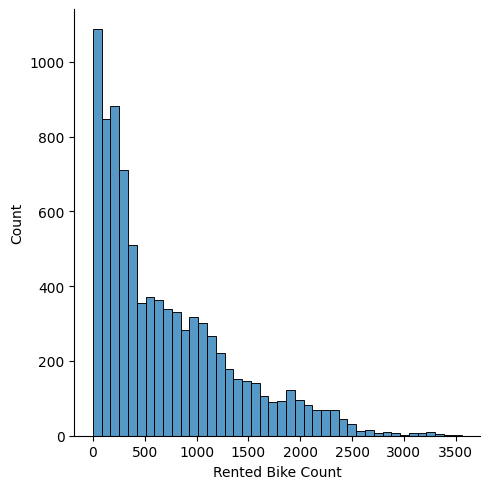

In [ ]:
plt.figure(figsize=(10,7))
sns.displot(data["Rented Bike Count"])

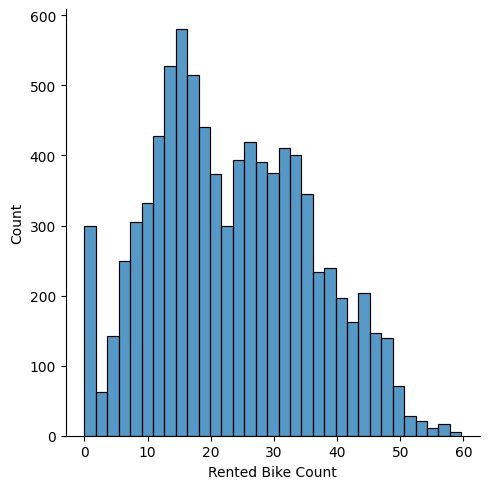

In [ ]:
sns.displot(np.sqrt(data["Rented Bike Count"]))

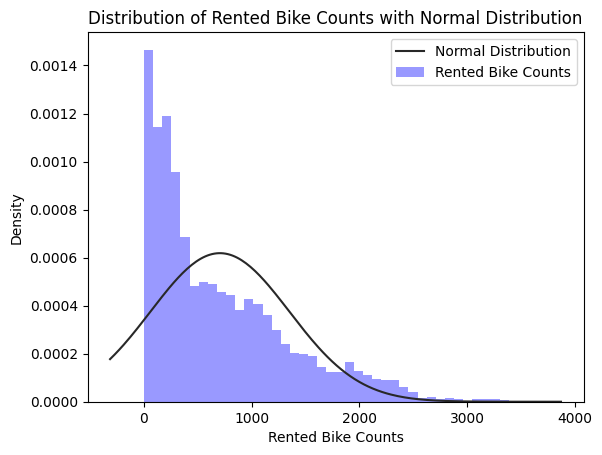

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot the distribution of the "Rented Bike Counts" variable
sns.distplot(data["Rented Bike Count"], fit=norm, kde=False, color='blue')

# Overlay a normal distribution curve on the plot
plt.title('Distribution of Rented Bike Counts with Normal Distribution')
plt.xlabel('Rented Bike Counts')
plt.ylabel('Density')
plt.legend(['Normal Distribution', 'Rented Bike Counts'])
plt.show()


# # Plot the distribution of the "Rented Bike Counts" variable
# sns.distplot(data["Rented Bike Counts"])
# plt.show()

#### **Skewed Data**

In [ ]:
data.skew().sort_values(ascending=True)
# Number which having the high value

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

In [ ]:
# import numpy as np
# import pandas as pd

# # Assuming 'data' is your DataFrame containing the data

# # Select highly skewed features
# highly_skewed_features = ['Rainfall(mm)', 'Snowfall (cm)']

# # Apply logarithmic transformation to highly skewed features
# for feature in highly_skewed_features:
#     data[feature] = np.log1p(data[feature])  # log transformation with addition of 1 to handle zero values

# # Check the skewness after transformation
# skewness_after_transformation = data[highly_skewed_features].skew()
# print("Skewness after transformation:")
# print(skewness_after_transformation)

#### **Remove Multicollinearity**

<Axes: >

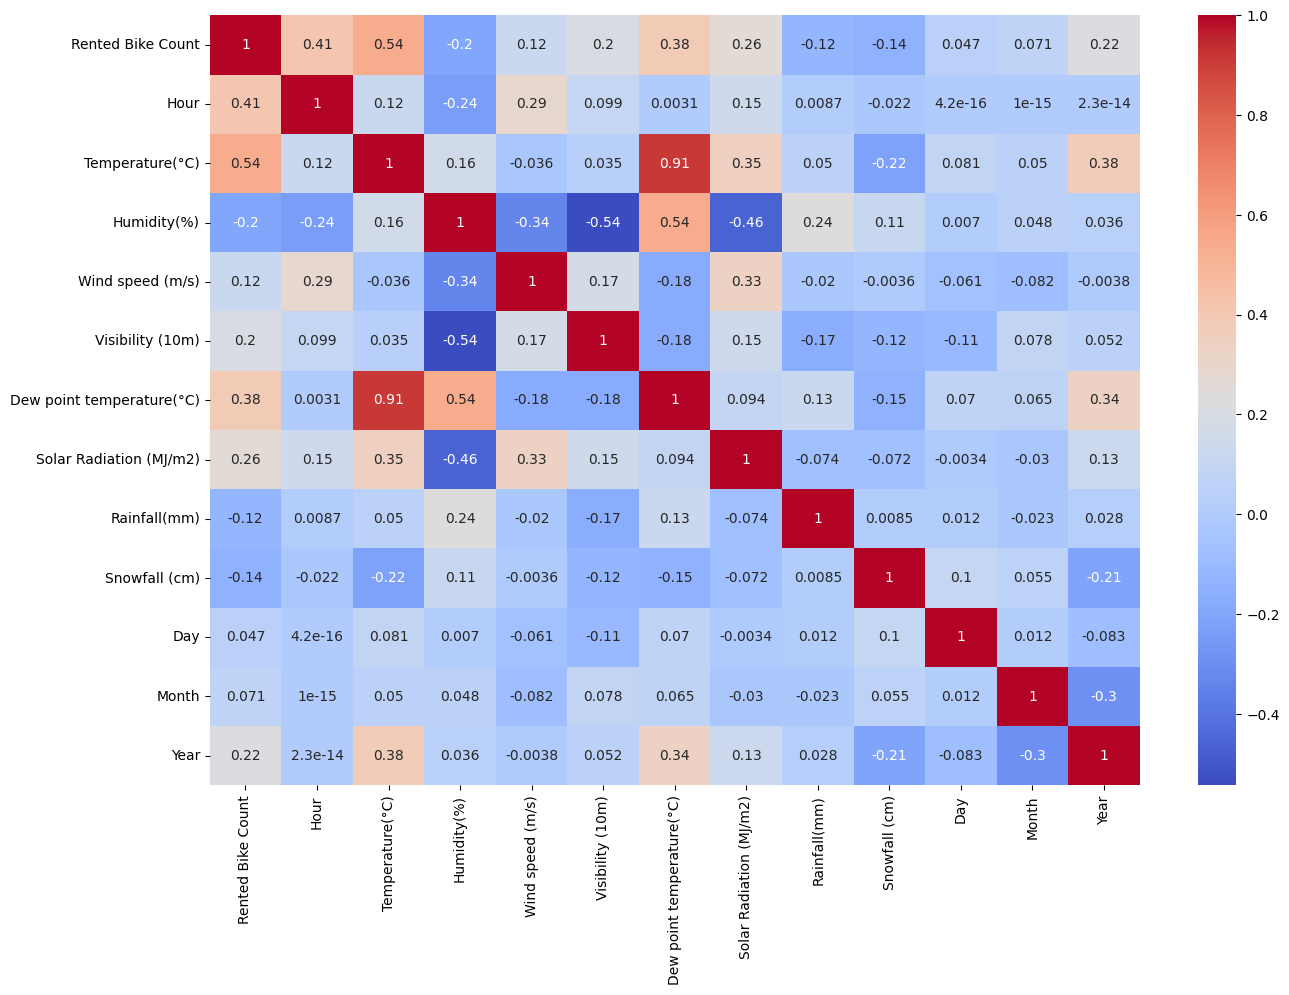

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot= True, cmap= "coolwarm")

#### **Calculating VIF**



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(data):

   #Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = data.columns
   vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

   return(vif)

In [ ]:
not_for_vif = ["Year","Rented Bike Count"]

get_vif(data[[i for i in data.describe().columns if i not in not_for_vif]])

,variables,VIF
0,Hour,4.424883
1,Temperature(°C),38.365560
2,Humidity(%),8.326992
3,Wind speed (m/s),4.836834
4,Visibility (10m),9.425316
5,Dew point temperature(°C),19.812251
6,Solar Radiation (MJ/m2),2.905084
7,Rainfall(mm),1.082979
8,Snowfall (cm),1.141184
9,Day,4.346307


In [ ]:
not_for_vif = ["Day","Month","Year","Rented Bike Count","Dew point temperature(°C)"]

get_vif(data[[i for i in data.describe().columns if i not in not_for_vif]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [ ]:
data.drop(["Dew point temperature(°C)"], axis =1, inplace = True)

<Axes: >

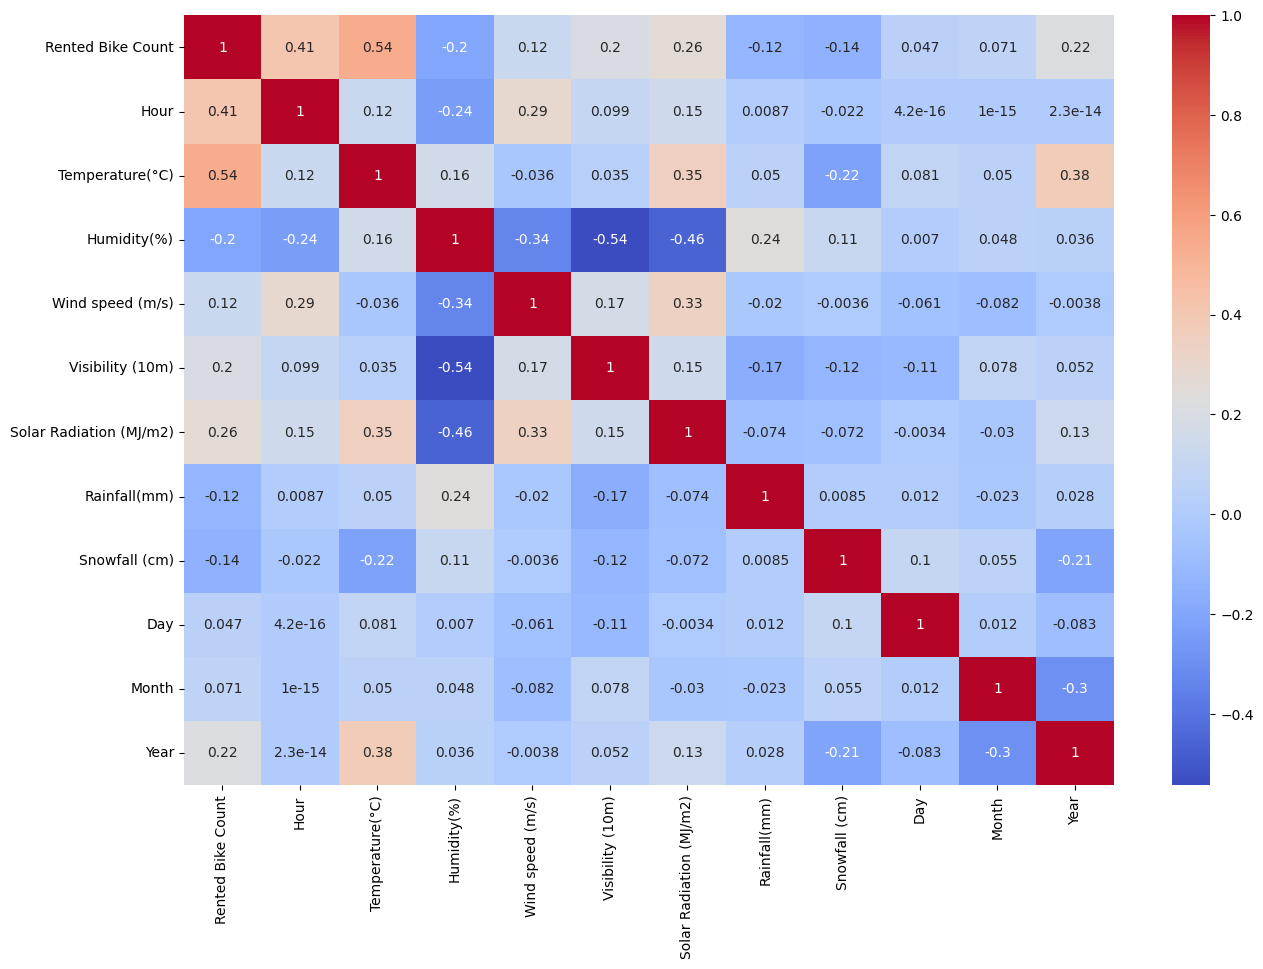

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot= True, cmap= "coolwarm")

In [ ]:
data.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,week_day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,12,1,2017


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  week_day                 8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  Month                   

In [ ]:
import pandas as pd
yearly_total = data.groupby('Year')['Rented Bike Count'].sum().reset_index()

print("\nYearly Total Rented Bikes:")
print(yearly_total)


Yearly Total Rented Bikes:
   Year  Rented Bike Count
0  2017             185330
1  2018            5986984



The yearly total rented bikes increased significantly from 2017 to 2018, with a substantial jump in the number of bikes rented.







In [ ]:
optimal_temp = data.groupby('Temperature(°C)')['Rented Bike Count'].sum().reset_index()
optimal_temp = optimal_temp.sort_values(by='Rented Bike Count', ascending=False)
print(optimal_temp)

     Temperature(°C)  Rented Bike Count
397             23.4              45078
405             24.2              42243
413             25.0              39936
354             19.1              38835
369             20.6              38398
..               ...                ...
8              -16.0                 92
21             -14.5                 90
2              -17.4                 64
13             -15.4                 49
3              -16.9                 36

[546 rows x 2 columns]


Here we can see clearly 23.4 degree celcius is the optimal temperature for bike renting and number of bike has been rented in this temperature is 45078 and worst one would be -16.9 degree celcius where on 36 bikes has been rent

In [ ]:
season_wise = data.groupby('Seasons')['Rented Bike Count'].sum().reset_index()
season_wise = season_wise.sort_values(by='Rented Bike Count', ascending=False)
print(season_wise)

  Seasons  Rented Bike Count
2  Summer            2283234
0  Autumn            1790002
1  Spring            1611909
3  Winter             487169


we can clearly see here summer would be be the best season for bike renting.

#### **Encoding**

In [ ]:
col=[]
for x in data.columns:
  if data[x].dtypes == "object":
    col.append(x)
col

['Seasons', 'Holiday', 'Functioning Day', 'week_day']

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for x in columns:
#     data[x]=le.fit_transform(data[x])
#     le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#     print('Feature', x)
#     print('mapping', le_name_mapping)

In [ ]:
cat_features = ['Seasons', 'Holiday', 'Functioning Day', 'weekday']

In [ ]:
data["Holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
data["Functioning Day"].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
data["Holiday"] = data["Holiday"].map({"No Holiday": 0, "Holiday" : 1})
data["Functioning Day"] = data["Functioning Day"].map({"No": 0, "Yes": 1})

In [ ]:
data["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
data["week_day"].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: week_day, dtype: int64

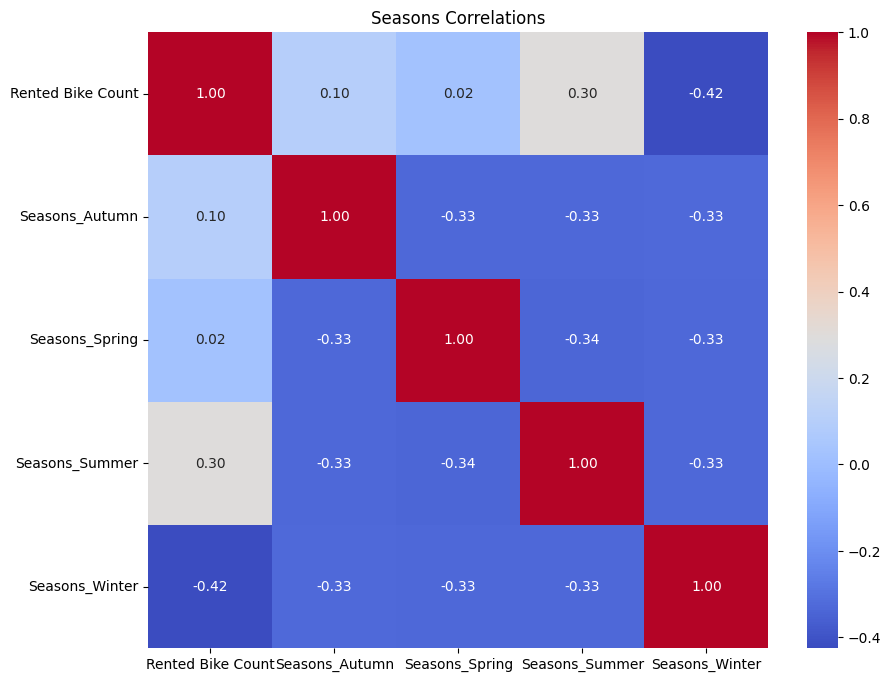

In [ ]:
df_corr1 = data[['Rented Bike Count', 'Seasons']]
df_corr1 = pd.get_dummies(df_corr1)
corr_matrix1 = df_corr1.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Seasons Correlations")
plt.show()

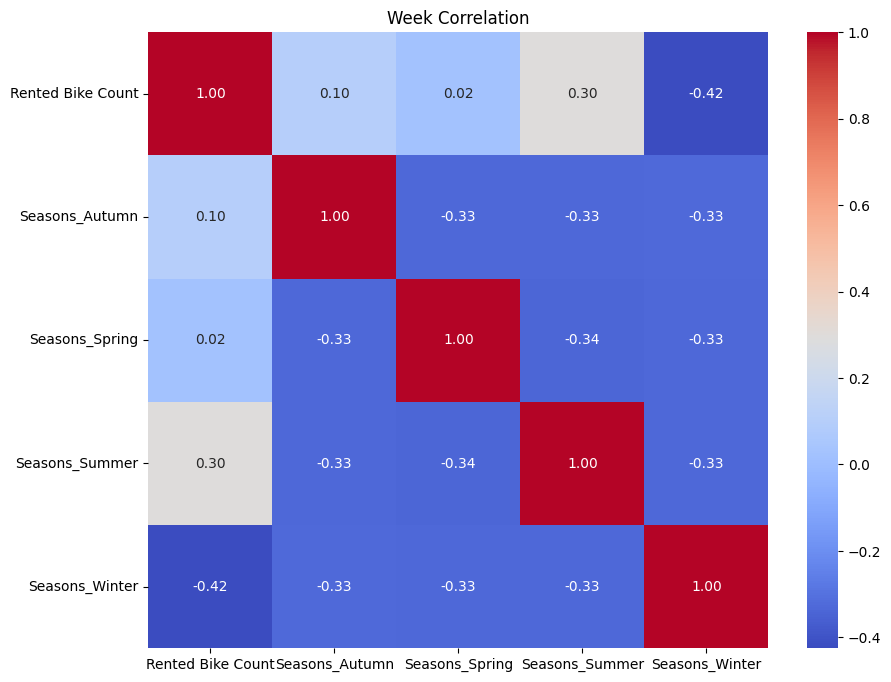

In [ ]:
df_corr2 = data[['Rented Bike Count', 'week_day']]
df_corr2 = pd.get_dummies(df_corr1)
corr_matrix2 = df_corr2.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Week Correlation")
plt.show()

In [ ]:
import pandas as pd

df_seasons = pd.get_dummies(data["Seasons"])
df_weekday = pd.get_dummies(data["week_day"])

In [ ]:
data = pd.concat([data, df_seasons, df_weekday], axis= 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  week_day                 8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  Month                   

In [ ]:
data.drop(["Seasons","week_day","Autumn","Sunday"],axis=1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int64  
 12  Month                    8760 non-null   int64  
 13  Year                     8760 non-null   int64  
 14  Spring                  

In [ ]:
data.shape

(8760, 23)

In [ ]:
column_names = data.columns.tolist()
# Print the column names
for column_name in column_names:
    print(column_name)

Rented Bike Count
Hour
Temperature(°C)
Humidity(%)
Wind speed (m/s)
Visibility (10m)
Solar Radiation (MJ/m2)
Rainfall(mm)
Snowfall (cm)
Holiday
Functioning Day
Day
Month
Year
Spring
Summer
Winter
Friday
Monday
Saturday
Thursday
Tuesday
Wednesday


In [ ]:
#data.to_csv('Seoul_bike_new.csv', index=False)

In [ ]:
# data.drop(["Functioning Day","Holiday"], axis =1, inplace = True)

In [ ]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Year,Spring,Summer,Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,2017,0,0,1,0,0,0,1,0,0


#### **Split Data for Training & Testing**

In [ ]:
X = data.drop("Rented Bike Count", axis= 1)
Y = data["Rented Bike Count"]

In [ ]:
print(X.shape)
print(Y.shape)

(8760, 22)
(8760,)


#### **Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
#transform the independent variables
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y ,test_size = 0.2, random_state = 2023)

In [ ]:
print("x_train:", x_train.shape, "| y_train:", y_train.shape,"\nx_test :",x_test.shape, "| y_test :", y_test.shape)

x_train: (7008, 22) | y_train: (7008,) 
x_test : (1752, 22) | y_test : (1752,)


In [ ]:
# returns the mean values of each feature in the data that were used to fit the scaler during the scaling process.
scaler.mean_

array([1.15000000e+01, 1.28829224e+01, 5.82262557e+01, 1.72490868e+00,
       1.43682580e+03, 5.69110731e-01, 1.48687215e-01, 7.50684932e-02,
       4.93150685e-02, 9.66324201e-01, 1.57205479e+01, 6.52602740e+00,
       2.01791507e+03, 2.52054795e-01, 2.52054795e-01, 2.46575342e-01,
       1.39726027e-01, 1.36986301e-01, 1.42465753e-01, 1.42465753e-01,
       1.45205479e-01, 1.45205479e-01])

# **Training Multiple Models**


In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
# Creating Multiple Models
lr = LinearRegression().fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

ridge = Ridge().fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

lasso = Lasso().fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

svr = SVR().fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

knnr = KNeighborsRegressor().fit(x_train, y_train)
y_pred_knnr = knnr.predict(x_test)

dtr = DecisionTreeRegressor().fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)

rfr = RandomForestRegressor().fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)

# **Training Score**

In [ ]:
from sklearn.metrics import r2_score
# Print R-squared scores
print("Score For x_train and y_train")
print()
print("Linear Regression:",lr.score(x_train, y_train))
print("Ridge Regression:",ridge.score(x_train, y_train))
print("Lasso Regression:",lasso.score(x_train, y_train))
print("Support Vector Regressor:",svr.score(x_train, y_train))
print("KNeighbors Regressor:",knnr.score(x_train, y_train))
print("Decision Tree Regressor:",dtr.score(x_train, y_train))
print("Random Forest Regressor:",rfr.score(x_train, y_train))

Score For x_train and y_train

Linear Regression: 0.5569862390402753
Ridge Regression: 0.5569862004715889
Lasso Regression: 0.556807474945356
Support Vector Regressor: 0.2086069651355491
KNeighbors Regressor: 0.840935475437671
Decision Tree Regressor: 1.0
Random Forest Regressor: 0.9849265678430061


# **Validation Score**

In [ ]:
from sklearn.metrics import r2_score
# Print R-squared scores
print("R-squared scores:")
print("Linear Regression:",r2_score(y_test, y_pred_lr))
print("Ridge Regression:",r2_score(y_test, y_pred_ridge))
print("Lasso Regression:",r2_score(y_test, y_pred_lasso))
print("Support Vector Regressor:",r2_score(y_test, y_pred_svr))
print("KNeighbors Regressor:",r2_score(y_test, y_pred_knnr))
print("Decision Tree Regressor:",r2_score(y_test, y_pred_dtr))
print("Random Forest Regressor:",r2_score(y_test, y_pred_rfr))

R-squared scores:
Linear Regression: 0.5371041582058085
Ridge Regression: 0.537106183398059
Lasso Regression: 0.5373312206936876
Support Vector Regressor: 0.21315437129344794
KNeighbors Regressor: 0.7483074044487467
Decision Tree Regressor: 0.7729235387352321
Random Forest Regressor: 0.8926719640462737


# **Valdidation Error Metrics**

In [ ]:
# Function to get metrics
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    return {'Model': model_name, 'MSE': MSE, 'RMSE': RMSE, 'MAE': MAE, 'R2': R2}

# Calculate and print metrics for each model

metrics_lr = get_metrics(y_test, y_pred_lr, "LinearRegression")
print(metrics_lr)

metrics_ridge = get_metrics(y_test, y_pred_ridge, "Ridge")
print(metrics_ridge)

metrics_lasso = get_metrics(y_test, y_pred_lasso, "Lasso")
print(metrics_lasso)

metrics_svr = get_metrics(y_test, y_pred_svr, "SVR")
print(metrics_svr)

metrics_knnr = get_metrics(y_test, y_pred_knnr, "KNeighborsRegressor")
print(metrics_knnr)

metrics_dtr = get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")
print(metrics_dtr)

metrics_rfr = get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
print(metrics_rfr)

{'Model': 'LinearRegression', 'MSE': 188944.7647024072, 'RMSE': 434.67777111603857, 'MAE': 330.90444197138504, 'R2': 0.5371041582058085}
{'Model': 'Ridge', 'MSE': 188943.93805969687, 'RMSE': 434.6768202466021, 'MAE': 330.8981157299797, 'R2': 0.537106183398059}
{'Model': 'Lasso', 'MSE': 188852.0823655369, 'RMSE': 434.5711476450512, 'MAE': 330.5810764923878, 'R2': 0.5373312206936876}
{'Model': 'SVR', 'MSE': 321174.5467335124, 'RMSE': 566.7226365105884, 'MAE': 388.4724436904657, 'R2': 0.21315437129344794}
{'Model': 'KNeighborsRegressor', 'MSE': 102735.85102739726, 'RMSE': 320.5243376522246, 'MAE': 210.09874429223746, 'R2': 0.7483074044487467}
{'Model': 'DecisionTreeRegressor', 'MSE': 92688.04052511415, 'RMSE': 304.4471062846782, 'MAE': 171.5873287671233, 'R2': 0.7729235387352321}
{'Model': 'RandomForestRegressor', 'MSE': 43809.14380359589, 'RMSE': 209.3063396163525, 'MAE': 125.17856735159818, 'R2': 0.8926719640462737}


# **Boosting Algorithms**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# AdaBoost
adaboost_model = AdaBoostRegressor(random_state= 7)
adaboost_model.fit(x_train, y_train)
y_pred_adaboost = adaboost_model.predict(x_test)
rmse_adaboost = np.sqrt(mean_squared_error(y_test, y_pred_adaboost))
print('RMSE (AdaBoost):' ,rmse_adaboost)

# Gradient Boosting
gradient_model = GradientBoostingRegressor(random_state= 7)
gradient_model.fit(x_train, y_train)
y_pred_gradient = gradient_model.predict(x_test)
rmse_gradient = np.sqrt(mean_squared_error(y_test, y_pred_gradient))
print('RMSE (Gradient Boosting):', rmse_gradient)

# XGBoost
xgbr_model = XGBRegressor(random_state= 7)
xgbr_model.fit(x_train, y_train)
y_pred_xgbr = xgbr_model.predict(x_test)
rmse_xgbr = np.sqrt(mean_squared_error(y_test, y_pred_xgbr))
print('RMSE (XGBoost):', rmse_xgbr)

print("XGBR:",xgbr_model.score(x_train, y_train))
get_metrics(y_test, y_pred_xgbr, "XGBRegressor with Best Parameters")

RMSE (AdaBoost): 450.93618526925303
RMSE (Gradient Boosting): 253.8444122442482
RMSE (XGBoost): 186.89263802880993
XGBR: 0.9817963162248369


{'Model': 'XGBRegressor with Best Parameters',
 'MSE': 34928.85814936777,
 'RMSE': 186.89263802880993,
 'MAE': 115.63073999356462,
 'R2': 0.9144277788197669}

# **Visualize model prediction**

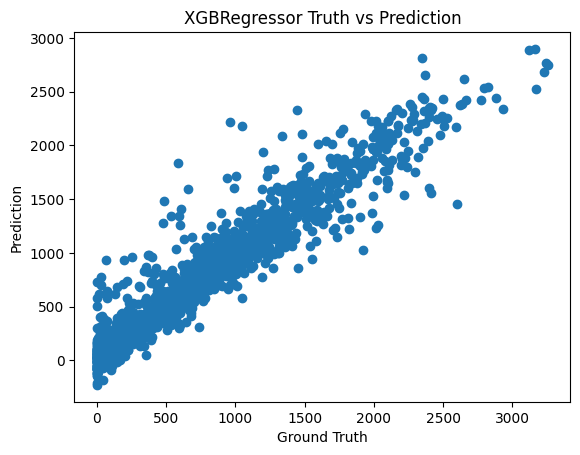

In [ ]:
plt.scatter(y_test, y_pred_xgbr)
plt.title("XGBRegressor Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

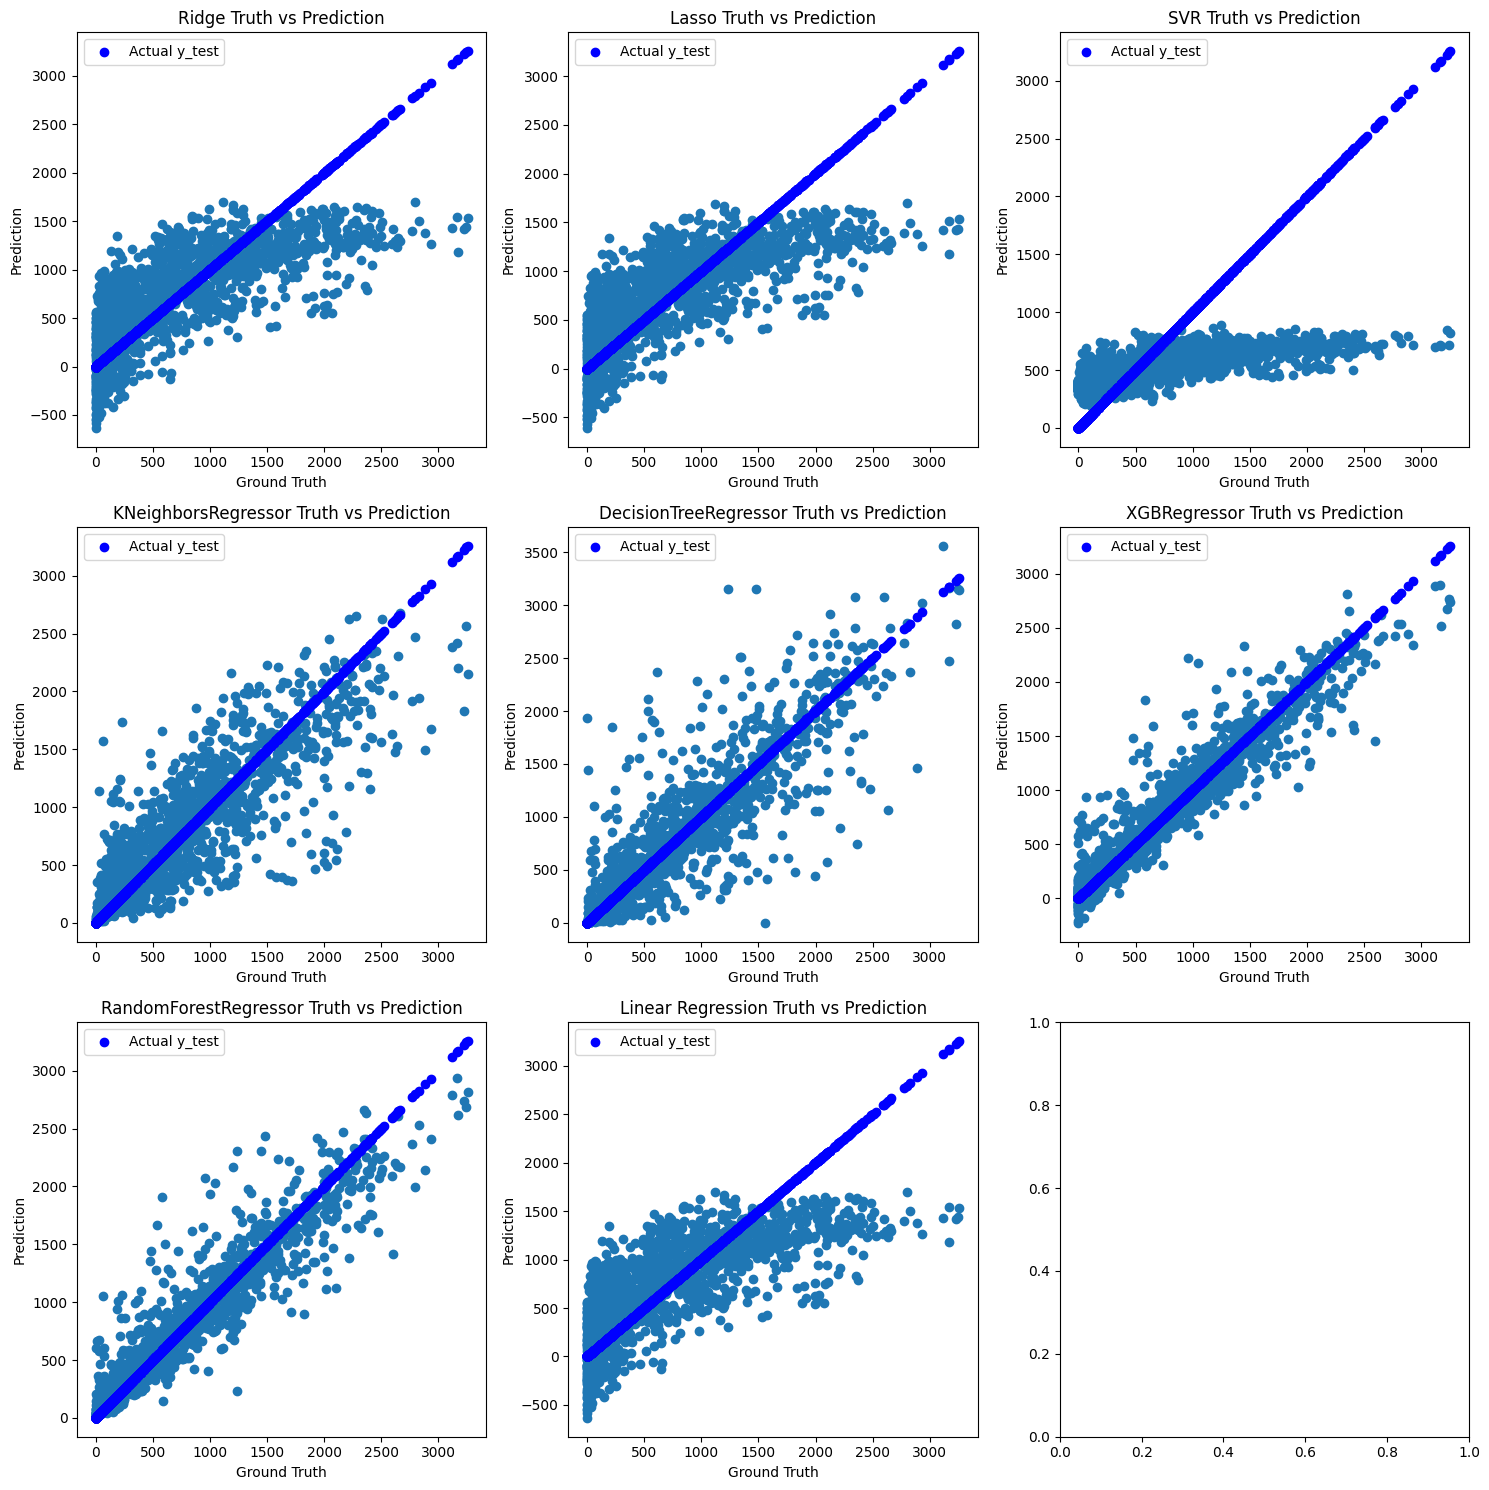

In [ ]:
import matplotlib.pyplot as plt

# Create subplots for all scatter plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

scatter_data = [
    (y_test, y_pred_ridge, "Ridge Truth vs Prediction"),
    (y_test, y_pred_lasso, "Lasso Truth vs Prediction"),
    (y_test, y_pred_svr, "SVR Truth vs Prediction"),
    (y_test, y_pred_knnr, "KNeighborsRegressor Truth vs Prediction"),
    (y_test, y_pred_dtr, "DecisionTreeRegressor Truth vs Prediction"),
    (y_test, y_pred_xgbr, "XGBRegressor Truth vs Prediction"),
    (y_test, y_pred_rfr, "RandomForestRegressor Truth vs Prediction"),
    (y_test, y_pred_lr, "Linear Regression Truth vs Prediction")
]

for ax, scatter_tuple in zip(axes, scatter_data):
    ax.scatter(*scatter_tuple[0:2])

    # Scatter plot for actual y_test values
    ax.scatter(scatter_tuple[0], scatter_tuple[0], color='blue', label='Actual y_test')

    ax.set_title(scatter_tuple[2])
    ax.set_xlabel("Ground Truth")
    ax.set_ylabel("Prediction")
    ax.legend()

plt.tight_layout()
plt.show()


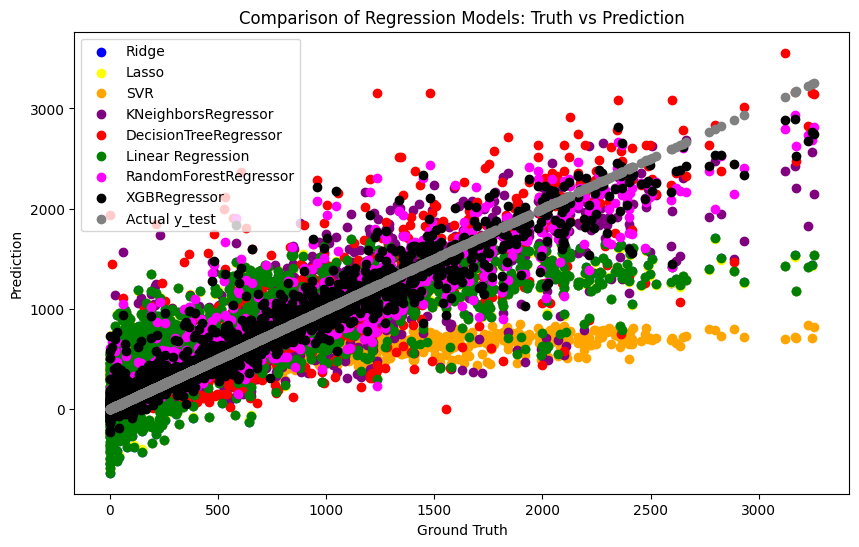

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for all models
plt.figure(figsize=(10, 6))

# Plotting scatter plots for each model's predictions with different colors
plt.scatter(y_test, y_pred_ridge, color='blue', label='Ridge')
plt.scatter(y_test, y_pred_lasso, color='yellow', label='Lasso')
plt.scatter(y_test, y_pred_svr, color='orange', label='SVR')
plt.scatter(y_test, y_pred_knnr, color='purple', label='KNeighborsRegressor')
plt.scatter(y_test, y_pred_dtr, color='red', label='DecisionTreeRegressor')
plt.scatter(y_test, y_pred_lr, color='green', label='Linear Regression')
plt.scatter(y_test, y_pred_rfr, color='magenta', label='RandomForestRegressor')
plt.scatter(y_test, y_pred_xgbr, color='black', label='XGBRegressor')


# Adding y_test values in a different color
plt.scatter(y_test, y_test, color='gray', label='Actual y_test')

plt.title("Comparison of Regression Models: Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.legend()
plt.show()

# **1. Random Forest Regressor - Hyperparameter tuning**

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import mean_squared_error, r2_score

# # Define the parameter grid for RandomizedSearchCV
# param_grid = {
#     'n_estimators': [70, 100, 200, 400],
#     'max_depth': [None, 10, 20, 30, 60,120],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt'],
#     'bootstrap': [True, False]
# }


# # Initialize Random Forest Regressor
# rf = RandomForestRegressor(random_state= 10)

# # Initialize RandomizedSearchCV with increased iterations
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=3, scoring='neg_mean_squared_error', random_state=7)

# # Fit the RandomizedSearchCV model
# random_search.fit(x_train, y_train)

# # Get the best model
# best_rf = random_search.best_estimator_

# # Make predictions on the testing set
# y_preds = best_rf.predict(x_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_preds)
# print("Mean Squared Error:", mse)

# r2 = r2_score(y_test, y_preds)
# print("R^2 Score:", r2)

# # Get the best parameters found by RandomizedSearchCV
# best_params = random_search.best_params_
# print("Best Parameters:", best_params)

In [ ]:
# random_search.best_params_

In [ ]:
rf_tuned = RandomForestRegressor(n_estimators = 400,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_features="sqrt",
                                 max_depth=120,
                                 bootstrap=False,
                                 random_state = 10)
rf_tuned.fit(x_train, y_train)
y_predss= rf_tuned.predict(x_test)

get_metrics(y_test, y_predss, "RandomForestregressor Fine Tuning")

{'Model': 'RandomForestregressor Fine Tuning',
 'MSE': 40121.117546283116,
 'RMSE': 200.30256500175707,
 'MAE': 125.23610183599696,
 'R2': 0.9017072607988814}

## **2. XGBoost Regressor - Hyperparameter tuning**

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# import time
# start_time - time.time()

# params = {'max_depth' :[3,5,6,10,15,20],
#           'learning_rate': [0.01,0.1,0.2,0.3],
#           'subsample' : np.arange(0.5,1.0,0.1),
#           'colsample_bytree' : np.arange(0.4, 1.0, 0.1),
#           'colsample_bylevel' : np.arange(0.4, 1.0, 0.1),
#           'n_estimators' :[100, 500, 1000]}

# xgbr = XGBRegressor(seed = 20)
# rscv = RandomizedSearchCV(estimator = xgbr,
#                           param_distributions = params,
#                           scoring = 'neg_mean_squared_error',
#                           n_iter = 25,
#                           cv = 5,
#                           verbose = 1)
# rscv.fit(x_train, y_train)
# y_pred_xgb_random = rscv.predict(x_test)
# get_metrics(y_test, y_pred_xgb_random,"XGBRegressor with Best Parameters")

# print("Time takend to training using randomize search : ", time.time()-start_time)
# print("Best parameters : ", rscv.best_params_)

In [ ]:
xgbr =  XGBRegressor(subsample = 0.6,
                                 n_estimators= 1000,
                                 max_depth = 6,
                                 learning_rate = 0.11,
                                 colsample_bytree = 0.7,
                                 colsample_bylevel= 0.4,
                                 seed = 20)
xgbr.fit(x_train, y_train)
y_preds= xgbr.predict(x_test)

get_metrics(y_test, y_preds, "XGBRegressor with Best Parameters")

{'Model': 'XGBRegressor with Best Parameters',
 'MSE': 31030.863461092224,
 'RMSE': 176.15579315223277,
 'MAE': 112.5326713245345,
 'R2': 0.923977477301122}

## **Save Machine Learning Best Model**

In [ ]:
import pickle
import os

dir = r"/content/drive/MyDrive/Github/SeoupSeoul Bike Sharing Demand Prediction /Model Assets/xgboost_regressor_m2_0.923.pkl"
pickle.dump(xgbr, open(dir, "wb"))

## **Dump Scaling Parameters**

In [ ]:
scaler_dump_path = r"/content/drive/MyDrive/Github/SeoupSeoul Bike Sharing Demand Prediction /Model Assets/scaler.pkl"
pickle.dump(scaler, open(scaler_dump_path, "wb"))